In [2]:
import pandas as pd

df = pd.DataFrame({
    'A' : ['a', 'b', 'c', 'a', 'b'],
    'B' : [1, 2, 3, 1, 0]
})

df

,A,B
0,a,1
1,b,2
2,c,3
3,a,1
4,b,0


In [3]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df['A'])

LabelEncoder()

In [4]:
le.classes_

array(['a', 'b', 'c'], dtype=object)

In [5]:
df['le_A'] = le.transform(df['A'])
df

,A,B,le_A
0,a,1,0
1,b,2,1
2,c,3,2
3,a,1,0
4,b,0,1


In [6]:
le.transform(['a', 'b', 'c', 'a', 'c'])

array([0, 1, 2, 0, 2])

In [7]:
le.inverse_transform([0, 1, 2])

array(['a', 'b', 'c'], dtype=object)

In [8]:
df = pd.DataFrame({
    'A' : [10, 20, -10, 0, 25],
    'B' : [1, 2, 3, 1, 0]
})

df

,A,B
0,10,1
1,20,2
2,-10,3
3,0,1
4,25,0


In [9]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(df)

MinMaxScaler()

In [10]:
df

,A,B
0,10,1
1,20,2
2,-10,3
3,0,1
4,25,0


In [11]:
mms.data_min_, mms.data_max_

(array([-10.,   0.]), array([25.,  3.]))

In [12]:
mms.transform(df)

array([[0.57142857, 0.33333333],
       [0.85714286, 0.66666667],
       [0.        , 1.        ],
       [0.28571429, 0.33333333],
       [1.        , 0.        ]])

In [13]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(df)

StandardScaler()

In [14]:
df

,A,B
0,10,1
1,20,2
2,-10,3
3,0,1
4,25,0


In [15]:
ss.mean_, ss.scale_

(array([9. , 1.4]), array([12.80624847,  1.0198039 ]))

In [16]:
import numpy as np

np.mean(df['A']), np.std(df['A'])

(9.0, 12.806248474865697)

In [17]:
ss.transform(df)

array([[ 0.07808688, -0.39223227],
       [ 0.85895569,  0.58834841],
       [-1.48365074,  1.56892908],
       [-0.70278193, -0.39223227],
       [ 1.2493901 , -1.37281295]])

In [18]:
ss.fit_transform(df)

array([[ 0.07808688, -0.39223227],
       [ 0.85895569,  0.58834841],
       [-1.48365074,  1.56892908],
       [-0.70278193, -0.39223227],
       [ 1.2493901 , -1.37281295]])

In [21]:
df = pd.DataFrame({
    'A' : [-0.1, 0., 0.1, 0.2, 0.3, 0.4, 1.0, 1.1, 5.]
})

df

,A
0,-0.1
1,0.0
2,0.1
3,0.2
4,0.3
5,0.4
6,1.0
7,1.1
8,5.0


In [22]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

mm = MinMaxScaler()
ss = StandardScaler()
rs = RobustScaler()

In [23]:
df_scaler = df.copy()

In [24]:
df_scaler['mm'] = mm.fit_transform(df)
df_scaler['ss'] = ss.fit_transform(df)
df_scaler['rs'] = rs.fit_transform(df)

df_scaler

,A,mm,ss,rs
0,-0.1,0.000000,-0.656688,-0.444444
1,0.0,0.019608,-0.590281,-0.333333
2,0.1,0.039216,-0.523875,-0.222222
3,0.2,0.058824,-0.457468,-0.111111
4,0.3,0.078431,-0.391061,0.000000
5,0.4,0.098039,-0.324655,0.111111
6,1.0,0.215686,0.073785,0.777778
7,1.1,0.235294,0.140192,0.888889
8,5.0,1.000000,2.730051,5.222222


<Axes: >

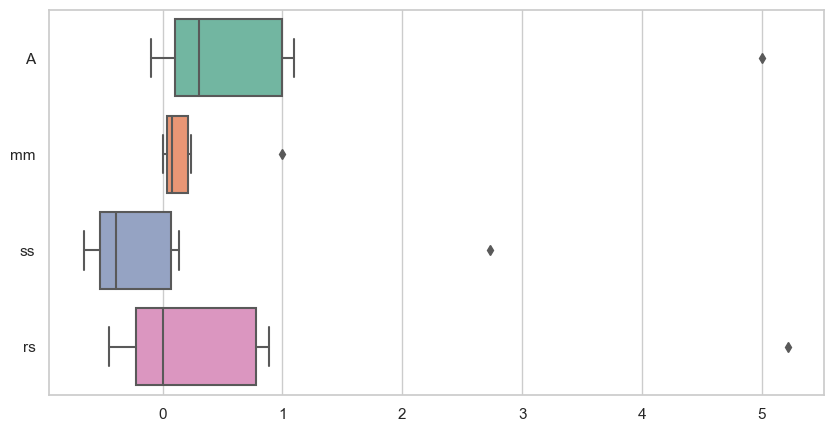

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style = 'whitegrid')
plt.figure(figsize = (10, 5))
sns.boxplot(data = df_scaler, orient = 'h', palette = 'Set2')